In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [3]:
data_dir

'.\\datasets\\flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [5]:
image_count = len (list(data_dir.glob('*/*.jpg')))
image_count

3670

In [6]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

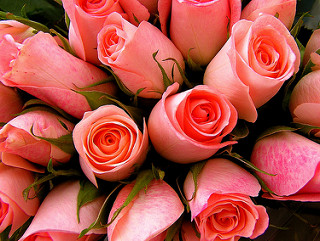

In [7]:
PIL.Image.open(str(roses[8]))

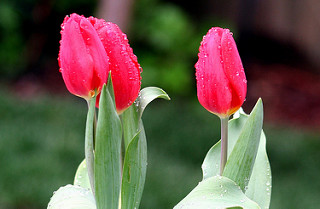

In [8]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [9]:
flowers_images_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*'))
}

In [10]:
flowers_label_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4
}

In [11]:
flowers_images_dict['roses'][0]

WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [12]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
# img.shape

In [13]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [14]:
x, y = [],[]

for flower_name, images_path in flowers_images_dict.items():
    for image_path in images_path:
        img = cv2.imread(str(image_path))
        resized_img = cv2.resize(img,(180, 180))
        x.append(resized_img)
        y.append(flowers_label_dict[flower_name])

In [15]:
x = np.array(x)
y = np.array(y)

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 0)

In [17]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [18]:
x_train_scaled.shape

(2752, 180, 180, 3)

In [19]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(180,180,3)),
])

In [20]:
model = Sequential([
    #cnn
    data_augmentation,
    layers.Conv2D(16, 3, padding= 'same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding= 'same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding= 'same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(5)
])

model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics = ['accuracy'])

model.fit(x_train_scaled, y_train, epochs =15)

Epoch 1/15
86/86 [==============================] - 7s 33ms/step - loss: 1.3045 - accuracy: 0.4597
Epoch 2/15
86/86 [==============================] - 3s 33ms/step - loss: 1.0331 - accuracy: 0.5847
Epoch 3/15
86/86 [==============================] - 3s 38ms/step - loss: 0.9143 - accuracy: 0.6432
Epoch 4/15
86/86 [==============================] - 3s 34ms/step - loss: 0.8584 - accuracy: 0.6653
Epoch 5/15
86/86 [==============================] - 3s 35ms/step - loss: 0.7906 - accuracy: 0.6948
Epoch 6/15
86/86 [==============================] - 3s 34ms/step - loss: 0.7604 - accuracy: 0.7155
Epoch 7/15
86/86 [==============================] - 3s 34ms/step - loss: 0.6947 - accuracy: 0.7366
Epoch 8/15
86/86 [==============================] - 3s 34ms/step - loss: 0.6973 - accuracy: 0.7289
Epoch 9/15
86/86 [==============================] - 3s 33ms/step - loss: 0.6722 - accuracy: 0.7435
Epoch 10/15
86/86 [==============================] - 3s 33ms/step - loss: 0.6441 - accuracy: 0.7507
Epoch 11/

In [21]:
model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 1s 19ms/step - loss: 0.8676 - accuracy: 0.7157


[0.8676286339759827, 0.7156862616539001]